# Lecture 29: Correlation

In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

## Prediction

In [2]:
galton = Table.read_table('galton.csv')
galton.show(3)

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69


In [3]:
def predict_child(new_midparent_height):
    close_points = galton.where('midparentHeight', 
                                are.between(new_midparent_height - 0.5, 
                                            new_midparent_height + 0.5))
    return close_points.column('childHeight').mean()    

In [4]:
# Apply predict_child to all the parent averages

height_pred = galton.with_column(
    'prediction', galton.apply(predict_child, 'midparentHeight')
)
height_pred

family,father,mother,midparentHeight,children,childNum,gender,childHeight,prediction
1,78.5,67,75.43,4,1,male,73.2,70.1
1,78.5,67,75.43,4,2,female,69.2,70.1
1,78.5,67,75.43,4,3,female,69,70.1
1,78.5,67,75.43,4,4,female,69,70.1
2,75.5,66.5,73.66,4,1,male,73.5,70.4158
2,75.5,66.5,73.66,4,2,male,72.5,70.4158
2,75.5,66.5,73.66,4,3,female,65.5,70.4158
2,75.5,66.5,73.66,4,4,female,65.5,70.4158
3,75,64,72.06,2,1,male,71,68.5025
3,75,64,72.06,2,2,female,68,68.5025


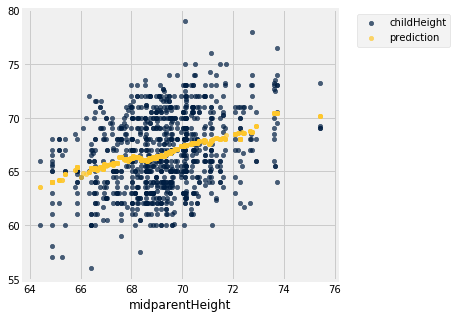

In [5]:
height_pred.select('childHeight', 'midparentHeight', 'prediction').scatter('midparentHeight')

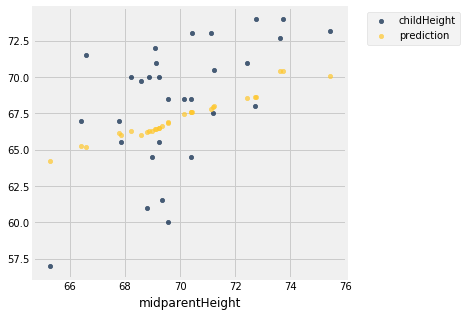

In [6]:
small = galton.sample(30)
small = small.with_column(
    'prediction', small.apply(predict_child, 'midparentHeight')
)
small.select('childHeight', 'midparentHeight', 'prediction').scatter('midparentHeight')

## Visualize relation between two variables

In [7]:
# hybrid cars manufactured through 2013
# - msrp is adjusted to 2013 dollars
# - acceleration is in km per hour per second
hybrid = Table.read_table('hybrid.csv')
hybrid

vehicle,year,msrp,acceleration,mpg,class
Prius (1st Gen),1997,24509.7,7.46,41.26,Compact
Tino,2000,35355,8.2,54.1,Compact
Prius (2nd Gen),2000,26832.2,7.97,45.23,Compact
Insight,2000,18936.4,9.52,53,Two Seater
Civic (1st Gen),2001,25833.4,7.04,47.04,Compact
Insight,2001,19036.7,9.52,53,Two Seater
Insight,2002,19137,9.71,53,Two Seater
Alphard,2003,38084.8,8.33,40.46,Minivan
Insight,2003,19137,9.52,53,Two Seater
Civic,2003,14071.9,8.62,41,Compact


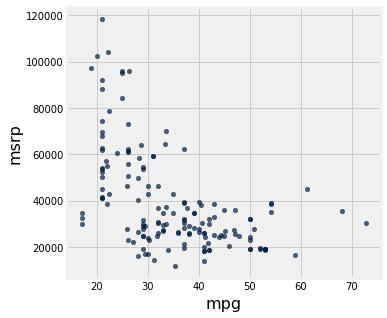

In [8]:
# price vs. mileage
hybrid.scatter('mpg', 'msrp') 

**Q:** Is there a relation between msrp and mpg?  Is it linear?

* A. No relation  
* B. Yes, linear  
* C. Yes, non-linear  

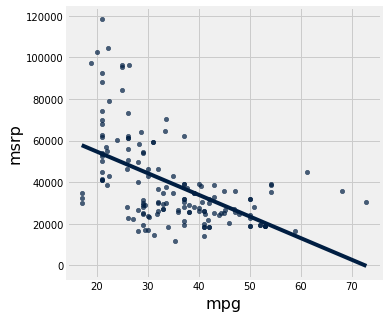

In [9]:
# price vs. mileage
hybrid.scatter('mpg', 'msrp', fit_line=True)

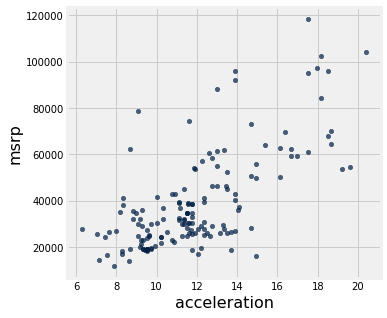

In [10]:
# price vs. acceleration
hybrid.scatter('acceleration', 'msrp')

**Q:** Is there a relation between msrp and acceleration? Is it linear?

* A. No relation  
* B. Yes, linear  
* C. Yes, non-linear  


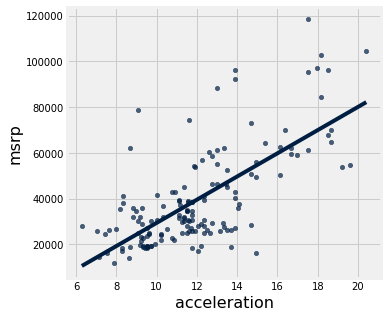

In [11]:
# price vs. acceleration
hybrid.scatter('acceleration', 'msrp', fit_line=True)

**Q:** What are people paying for (at least with hybrid cars)?  Do the data tell us why?

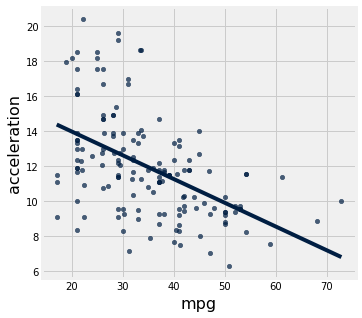

In [12]:
hybrid.scatter('mpg', 'acceleration', fit_line=True)

## Quantify linearity

In [13]:
# ignore this code
def r_scatter(r):
    "Generate a scatter plot with a correlation approximately r"
    plots.figure(figsize=(5,5))
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    plots.scatter(x, y)
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)

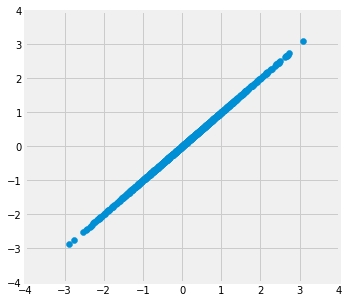

In [14]:
r_scatter(1)

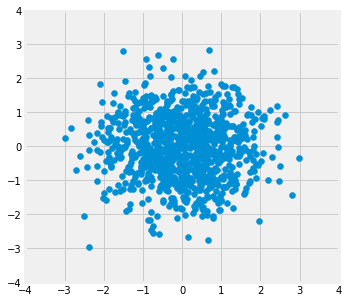

In [15]:
r_scatter(0)

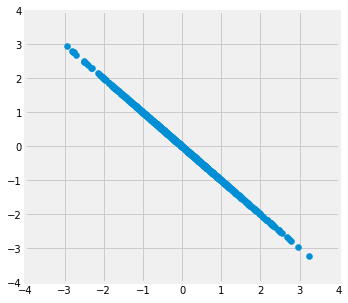

In [16]:
r_scatter(-1)

**Q:** What other r values would you like to see?

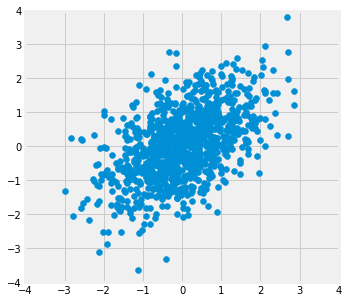

In [17]:
r_scatter(0.5)

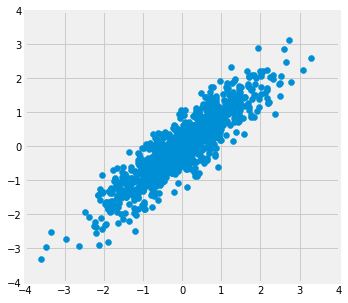

In [18]:
r_scatter(0.9)

## Computation of *r*
### Standard units

In [19]:
def standard_units(numbers):
    "Convert any array of numbers to standard units."
    std = np.std(numbers)
    mean = np.mean(numbers)
    return (numbers - mean) / std
    #return (numbers - np.mean(numbers)) / np.std(numbers)  

In [20]:
msrp = hybrid.column('msrp')
standard_units(msrp)

array([-6.93629778e-01, -1.85680450e-01, -5.84852243e-01, -9.54663360e-01,
       -6.31635515e-01, -9.49965690e-01, -9.45268019e-01, -5.78269994e-02,
       -9.45268019e-01, -1.18249757e+00, -1.23803745e-01, -9.40570349e-01,
       -8.88192024e-01, -4.32288483e-01,  8.99334852e-01, -6.07231046e-01,
       -4.74601708e-01, -9.33523843e-01, -9.87452445e-01, -9.36577563e-01,
       -1.07609650e+00, -3.12499289e-01, -2.12965813e-01, -4.43360092e-01,
        1.18158945e+00, -1.54874878e-01, -4.58745782e-01,  1.68840523e-01,
        3.23640243e-01,  3.71055861e+00, -6.78918997e-01,  8.32530979e-01,
       -8.05983726e-01, -7.67228647e-01, -2.18547283e-01,  1.07587172e+00,
        1.85533985e+00, -7.29491318e-01, -9.66877304e-01, -1.28659055e+00,
        3.23821967e-01,  9.92945890e-01, -6.87473629e-01,  2.66448761e+00,
       -4.12011688e-01, -3.94025762e-02, -8.17138235e-01,  2.71268065e+00,
       -6.88467300e-03, -6.81496862e-01, -6.04691119e-01,  2.61549028e-01,
        8.02681223e-02, -

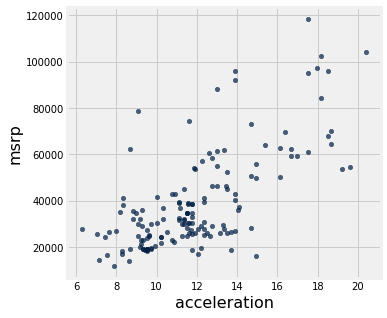

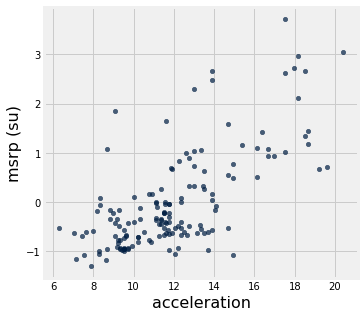

In [21]:
# price vs. acceleration
hybrid.scatter('acceleration', 'msrp')

# price vs. acceleration in standard units
hybrid_msrp_su = hybrid.with_column(
    'msrp (su)', 
    standard_units(hybrid.column('msrp'))
)
hybrid_msrp_su.scatter('acceleration', 'msrp (su)')

**Q:** How do those two charts differ?

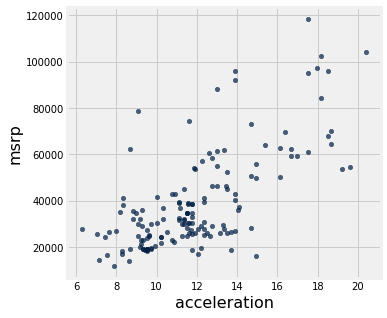

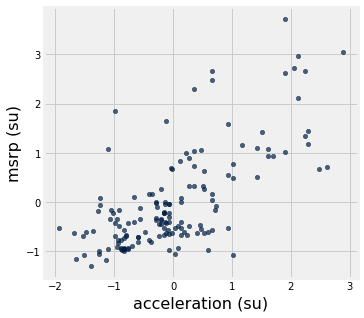

In [22]:
# price vs. acceleration
hybrid.scatter('acceleration', 'msrp')

# price in standard units vs. acceleration in standard units
hybrid_msrp_accel_su = hybrid_msrp_su.with_column(
    'acceleration (su)', 
    standard_units(hybrid.column('acceleration'))
)
hybrid_msrp_accel_su.scatter('acceleration (su)', 'msrp (su)')

In [23]:
def standardize(t):
    """Return a table in which all columns of t are converted to standard units."""
    t_su = Table()
    for label in t.labels:
        t_su = t_su.with_column(
            label + ' (su)', 
            standard_units(t.column(label))
    )
    return t_su

In [24]:
accel_msrp_su = standardize(hybrid.select('acceleration', 'msrp'))
accel_msrp_su

acceleration (su),msrp (su)
-1.53501,-0.69363
-1.2825,-0.18568
-1.36098,-0.584852
-0.832081,-0.954663
-1.67832,-0.631636
-0.832081,-0.949966
-0.767248,-0.945268
-1.23814,-0.057827
-0.832081,-0.945268
-1.13919,-1.1825


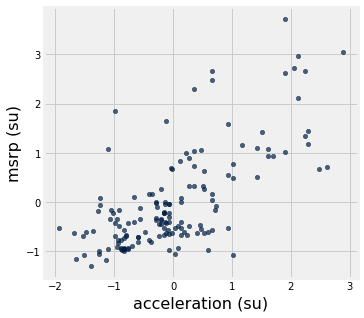

In [25]:
accel_msrp_su.scatter('acceleration (su)', 'msrp (su)')

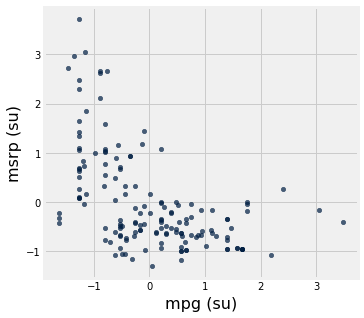

In [26]:
standardize(hybrid.select('mpg', 'msrp')).scatter('mpg (su)', 'msrp (su)', )

### Average of (product of (variables in standard units))

In [27]:
# Compute r value for acceleration and msrp
accel_msrp = hybrid.select('acceleration', 'msrp')
accel_msrp

acceleration,msrp
7.46,24509.7
8.2,35355
7.97,26832.2
9.52,18936.4
7.04,25833.4
9.52,19036.7
9.71,19137
8.33,38084.8
9.52,19137
8.62,14071.9


In [28]:
# variables in standard units
accel_msrp_su = standardize(accel_msrp)
accel_msrp_su

acceleration (su),msrp (su)
-1.53501,-0.69363
-1.2825,-0.18568
-1.36098,-0.584852
-0.832081,-0.954663
-1.67832,-0.631636
-0.832081,-0.949966
-0.767248,-0.945268
-1.23814,-0.057827
-0.832081,-0.945268
-1.13919,-1.1825


In [29]:
# product of (variables in standard units)
product = accel_msrp_su.column('acceleration (su)') * accel_msrp_su.column('msrp (su)')
product

array([ 1.06472770e+00,  2.38135296e-01,  7.95973874e-01,  7.94357217e-01,
        1.06008903e+00,  7.90448375e-01,  7.25254845e-01,  7.15979861e-02,
        7.86539533e-01,  1.34708384e+00,  6.92185942e-02,  8.37191854e-01,
        6.23879139e-01,  4.23127681e-01,  2.45963200e-01,  8.96880279e-01,
       -1.29800991e-01,  7.16244151e-01,  1.24619166e+00,  7.79308370e-01,
       -1.09111580e+00,  9.04779226e-02,  2.16446433e-01,  1.02647357e-01,
        2.69794884e+00,  1.42608787e-01, -2.08428803e-01, -6.04069882e-02,
        8.85138495e-02,  7.06698049e+00,  1.57184289e-01,  9.13333122e-02,
        2.99362099e-01,  3.16383411e-01,  3.49377868e-02, -1.19624792e+00,
       -1.81602258e+00,  6.06995845e-01, -5.74564875e-01,  1.79492963e+00,
        1.67016282e-01,  2.17354116e-01,  5.53266960e-01,  1.75611343e+00,
        5.74303597e-02,  5.49232992e-03,  4.87532723e-01,  5.55523109e+00,
        9.59655413e-04,  6.67054983e-01, -3.59336470e-01,  1.38467936e-01,
       -9.93832634e-02,  

In [30]:
accel_msrp_su_product = accel_msrp_su.with_column(
    'product', product
)
accel_msrp_su_product

acceleration (su),msrp (su),product
-1.53501,-0.69363,1.06473
-1.2825,-0.18568,0.238135
-1.36098,-0.584852,0.795974
-0.832081,-0.954663,0.794357
-1.67832,-0.631636,1.06009
-0.832081,-0.949966,0.790448
-0.767248,-0.945268,0.725255
-1.23814,-0.057827,0.071598
-0.832081,-0.945268,0.78654
-1.13919,-1.1825,1.34708


In [31]:
# average of (product of (variables in standard units))
np.mean(product)

0.6955778996913978

**Q:** Does that seem right?  How would you know?

<br/><br/><br/><br/><br/><br/><br/><br/>

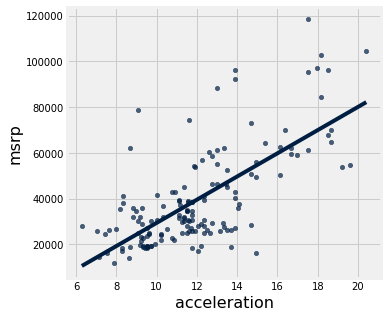

In [32]:
accel_msrp.scatter('acceleration', 'msrp', fit_line=True)

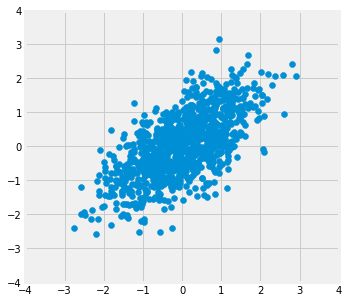

In [33]:
r_scatter(0.7)

### A function to compute *r*

In [34]:
def correlation(t, x, y):
    """The correlation coefficient of columns x and y in table t."""
    return np.mean(standard_units(t.column(x)) * standard_units(t.column(y)))

In [35]:
correlation(hybrid.select('acceleration', 'msrp'), 'acceleration', 'msrp')

0.6955778996913978

**Q:** What do you expect the correlation to be for the next chart?

* A. Below -1  
* B. Between -1 and 0  
* C. About 0  
* D. Between 0 and 1  
* E. Above 1  

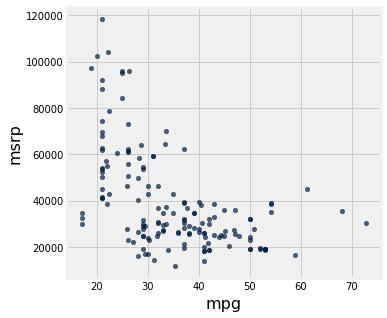

In [36]:
hybrid.scatter('mpg', 'msrp')

In [37]:
correlation(hybrid.select('mpg', 'msrp'), 'mpg', 'msrp')

-0.5318263633683786